# Contents
### Part 1: Random Forest
### Part 2: Deep Learning
### Part 3: Iteration

# Part 1: Random Forest

## Import/Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [2]:
path = r'C:\Users\rubix\Downloads\Machine Learning 2'

In [3]:
# Import
df_weather_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_weather_cleaned_with_date.csv'), index_col = False)
df_pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [4]:
# Check
df_weather_cleaned

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,19600101,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,19600102,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,19600103,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,19600104,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,19600105,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,20221028,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,20221029,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,20221030,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [5]:
# Check
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1980s

### Filter to 1980s

In [6]:
df_weather_cleaned_1980s = df_weather_cleaned[df_weather_cleaned['DATE'].astype(str).str.startswith('198')]
df_pleasant_1980s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('198')]

In [7]:
# Check
df_weather_cleaned_1980s

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
7305,19800101,6,0.83,1.0180,0.40,0.01,1.6,-0.8,-4.4,1.2,...,1.0130,0.17,0.05,0.0,4.4,2.1,6.0,3,1.0276,0.64
7306,19800102,5,0.84,1.0180,0.34,0.09,0.9,-1.7,-4.0,0.6,...,1.0195,0.12,1.48,0.0,6.4,1.0,11.5,3,1.0333,0.55
7307,19800103,8,0.80,1.0180,0.44,0.07,2.0,-0.6,-3.7,1.3,...,1.0058,0.13,0.60,0.0,9.2,6.2,12.2,1,1.0415,0.68
7308,19800104,8,0.94,1.0180,0.18,0.43,0.0,-0.9,-2.2,2.2,...,1.0034,0.30,0.50,1.5,7.7,5.8,9.2,2,1.0396,0.69
7309,19800105,8,0.90,1.0180,0.25,0.26,0.2,3.0,0.5,5.3,...,1.0134,0.22,0.03,0.1,7.6,6.1,9.5,7,1.0273,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,6,0.87,1.0157,0.49,0.00,4.0,-0.9,-2.4,1.8,...,1.0105,0.22,0.12,0.1,6.0,1.8,10.1,7,1.0264,0.93
10954,19891228,3,0.84,1.0196,0.54,0.00,6.4,-1.1,-2.8,1.8,...,1.0134,0.18,0.05,0.3,9.3,7.5,11.0,3,1.0298,0.83
10955,19891229,4,0.85,1.0224,0.52,0.00,5.5,-1.7,-4.5,1.3,...,1.0110,0.12,1.10,0.0,10.1,8.8,11.4,2,1.0361,0.83
10956,19891230,0,0.83,1.0233,0.57,0.00,6.6,-2.1,-4.3,1.6,...,1.0138,0.16,0.49,0.1,9.9,8.2,10.8,8,1.0343,0.80


In [8]:
# Check
df_pleasant_1980s

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,19800101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,19800102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,19800103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,19800104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,19800105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,19891228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,19891229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,19891230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop Date Columns

In [9]:
df_weather_cleaned_1980s = df_weather_cleaned_1980s.drop(columns=['DATE'])
df_pleasant_1980s = df_pleasant_1980s.drop(columns=['DATE'])

In [10]:
# Check
df_weather_cleaned_1980s

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
7305,6,0.83,1.0180,0.40,0.01,1.6,-0.8,-4.4,1.2,5,...,1.0130,0.17,0.05,0.0,4.4,2.1,6.0,3,1.0276,0.64
7306,5,0.84,1.0180,0.34,0.09,0.9,-1.7,-4.0,0.6,7,...,1.0195,0.12,1.48,0.0,6.4,1.0,11.5,3,1.0333,0.55
7307,8,0.80,1.0180,0.44,0.07,2.0,-0.6,-3.7,1.3,8,...,1.0058,0.13,0.60,0.0,9.2,6.2,12.2,1,1.0415,0.68
7308,8,0.94,1.0180,0.18,0.43,0.0,-0.9,-2.2,2.2,5,...,1.0034,0.30,0.50,1.5,7.7,5.8,9.2,2,1.0396,0.69
7309,8,0.90,1.0180,0.25,0.26,0.2,3.0,0.5,5.3,3,...,1.0134,0.22,0.03,0.1,7.6,6.1,9.5,7,1.0273,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,6,0.87,1.0157,0.49,0.00,4.0,-0.9,-2.4,1.8,7,...,1.0105,0.22,0.12,0.1,6.0,1.8,10.1,7,1.0264,0.93
10954,3,0.84,1.0196,0.54,0.00,6.4,-1.1,-2.8,1.8,7,...,1.0134,0.18,0.05,0.3,9.3,7.5,11.0,3,1.0298,0.83
10955,4,0.85,1.0224,0.52,0.00,5.5,-1.7,-4.5,1.3,8,...,1.0110,0.12,1.10,0.0,10.1,8.8,11.4,2,1.0361,0.83
10956,0,0.83,1.0233,0.57,0.00,6.6,-2.1,-4.3,1.6,8,...,1.0138,0.16,0.49,0.1,9.9,8.2,10.8,8,1.0343,0.80


In [11]:
# Check
df_pleasant_1980s

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Assign X and y

In [12]:
X = df_weather_cleaned_1980s.to_numpy()
y = df_pleasant_1980s.to_numpy()

In [13]:
# Shape check
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


### Split Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define Hyperparameter Distributions

In [15]:
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 30),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

### Run Optimization (RandomizedSearchCV)

In [16]:
rf = RandomForestClassifier(random_state=42)
random_search_decade = RandomizedSearchCV(
    rf, 
    param_distributions=param_distributions,
    n_iter=10,  # Start small
    cv=5,
    random_state=42,
    n_jobs=-2,  # Use all CPU cores except 1
    verbose=2
)
random_search_decade.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000187DF213390>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000187DF2795B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000187DF2134D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000187DF2F4980>},
                   random_state=42, verbose=2)

#### Results

In [ ]:
# Get best parameters
print("Best parameters:", random_search_decade.best_params_)
print("Best cross-validation score:", random_search_decade.best_score_)

# Evaluate on test set
test_score_decade = random_search_decade.score(X_test, y_test)
print("Test score with best parameters:", test_score_decade)

Best parameters: {'criterion': 'entropy', 'max_depth': 29, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 70}
Best cross-validation score: 0.6232004449127737
Test score with best parameters: 0.6347469220246238


### Run Random Forest (using new parameters)

In [18]:
# Fancy way to use results above
clf_decade_optimized = random_search_decade.best_estimator_

# Could also do code below if we wanted a brand new forest with our best parameters

# clf_optimized = RandomForestClassifier(**random_search.best_params_, random_state=42)
# clf_optimized.fit(X_train, y_train)

In [19]:
train_accuracy_optimized = clf_decade_optimized.score(X_train, y_train)
test_accuracy_optimized = clf_decade_optimized.score(X_test, y_test)

print(f"Training accuracy (optimized): {train_accuracy_optimized:.4f}")
print(f"Test accuracy (optimized): {test_accuracy_optimized:.4f}")

Training accuracy (optimized): 0.7447
Test accuracy (optimized): 0.6347


## All Years

In [20]:
# Check
df_weather_cleaned

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,19600101,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,19600102,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,19600103,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,19600104,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,19600105,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,20221028,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,20221029,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,20221030,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [21]:
# Check
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop Date Columns

In [22]:
df_weather_cleaned_no_date = df_weather_cleaned.drop(columns=['DATE'])
df_pleasant_no_date = df_pleasant.drop(columns=['DATE'])

In [23]:
# Check
df_weather_cleaned_no_date

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [24]:
# Check
df_pleasant_no_date

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Assign X and y

In [25]:
X = df_weather_cleaned_no_date.to_numpy()
y = df_pleasant_no_date.to_numpy()

In [26]:
# Shape check
print(X.shape)
print(y.shape)

(22950, 135)
(22950, 15)


### Split Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define Hyperparameter Distributions

In [28]:
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 30),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

### Run Optimization (RandomizedSearchCV)

In [ ]:
rf = RandomForestClassifier(random_state=42)
random_search_full = RandomizedSearchCV(
    rf, 
    param_distributions=param_distributions,
    n_iter=10,  # Start small
    cv=5,
    random_state=42,
    n_jobs=-2,  # Use all CPU cores except 1
    verbose=2
)
random_search_full.fit(X_train, y_train)

# Get best parameters
print("Best parameters:", random_search_full.best_params_)
print("Best cross-validation score:", random_search_full.best_score_)

# Evaluate on test set
test_score_full = random_search_full.score(X_test, y_test)
print("Test score with best parameters:", test_score_full)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 29, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 70}
Best cross-validation score: 0.709640522875817
Test score with best parameters: 0.7250544662309368


### Run Random Forest (using new parameters)

In [30]:
clf_all_optimized = random_search_full.best_estimator_

### Results

In [31]:
# Accuracy
train_accuracy_optimized = clf_all_optimized.score(X_train, y_train)
test_accuracy_optimized = clf_all_optimized.score(X_test, y_test)

print(f"Training accuracy (optimized): {train_accuracy_optimized:.4f}")
print(f"Test accuracy (optimized): {test_accuracy_optimized:.4f}")

Training accuracy (optimized): 0.8133
Test accuracy (optimized): 0.7251


In [32]:
# Make predictions
y_pred = clf_all_optimized.predict(X_test)

# Get per-station accuracy
print("Per-station classification report:")
print(classification_report(y_test, y_pred))

Per-station classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1099
           1       0.93      0.99      0.96      1561
           2       0.93      0.99      0.96      1461
           3       0.91      0.91      0.91       878
           4       0.97      1.00      0.98       975
           5       0.83      0.88      0.86       935
           6       0.93      0.90      0.91       743
           7       0.97      1.00      0.98      1229
           8       0.87      0.92      0.90       933
           9       0.93      1.00      0.96      2033
          10       0.94      0.93      0.93       952
          11       0.96      0.87      0.91       675
          12       0.00      0.00      0.00         0
          13       0.87      0.82      0.84       788
          14       0.88      0.22      0.35       228

   micro avg       0.92      0.94      0.93     14490
   macro avg       0.86      0.83      0.83  

c:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rubix\anaconda3\Lib\site-package

## Feature Importance

### Decade

Top 20 Most Important Features:
                      feature  importance
44        DUSSELDORF_temp_max    0.160439
35            DEBILT_temp_max    0.103148
40   DUSSELDORF_precipitation    0.074191
79        MAASTRICHT_temp_max    0.068212
88            MADRID_temp_max    0.055491
66    LJUBLJANA_precipitation    0.044177
61            KASSEL_temp_max    0.039658
8              BASEL_temp_max    0.038685
13     BELGRADE_precipitation    0.038094
59           KASSEL_temp_mean    0.027995
4         BASEL_precipitation    0.026825
17          BELGRADE_temp_max    0.023881
70         LJUBLJANA_temp_max    0.022086
84       MADRID_precipitation    0.020932
22     BUDAPEST_precipitation    0.020324
92     MUNCHENB_precipitation    0.020136
26          BUDAPEST_temp_max    0.016849
105             OSLO_temp_max    0.015974
49     HEATHROW_precipitation    0.011283
96          MUNCHENB_temp_max    0.010817

Importance by Observation Type:
observation_type
temp_max            0.580491
precipi

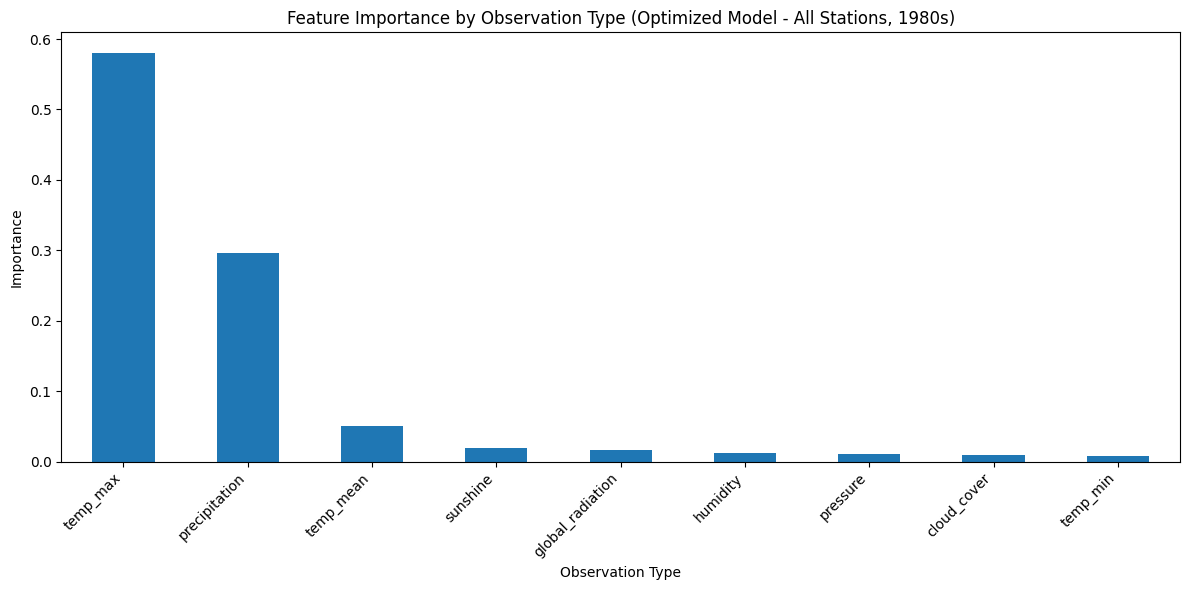

In [33]:
# Get feature importances
importances = clf_decade_optimized.feature_importances_

# Get all feature names
feature_names = [col for col in df_weather_cleaned_1980s.columns if col != 'DATE']

# Create a dataframe for easier analysis
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Show top 20 most important features
print("Top 20 Most Important Features:")
print(importance_df.head(20))

# Group by observation type (everything after station name)
importance_df['observation_type'] = importance_df['feature'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Sum importances by observation type
obs_type_importance = importance_df.groupby('observation_type')['importance'].sum().sort_values(ascending=False)

print("\nImportance by Observation Type:")
print(obs_type_importance)

# Create bar chart
plt.figure(figsize=(12, 6))
obs_type_importance.plot(kind='bar')
plt.ylabel('Importance')
plt.xlabel('Observation Type')
plt.title('Feature Importance by Observation Type (Optimized Model - All Stations, 1980s)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importance_by_type_optimized_decade.png'), bbox_inches='tight')
plt.show()

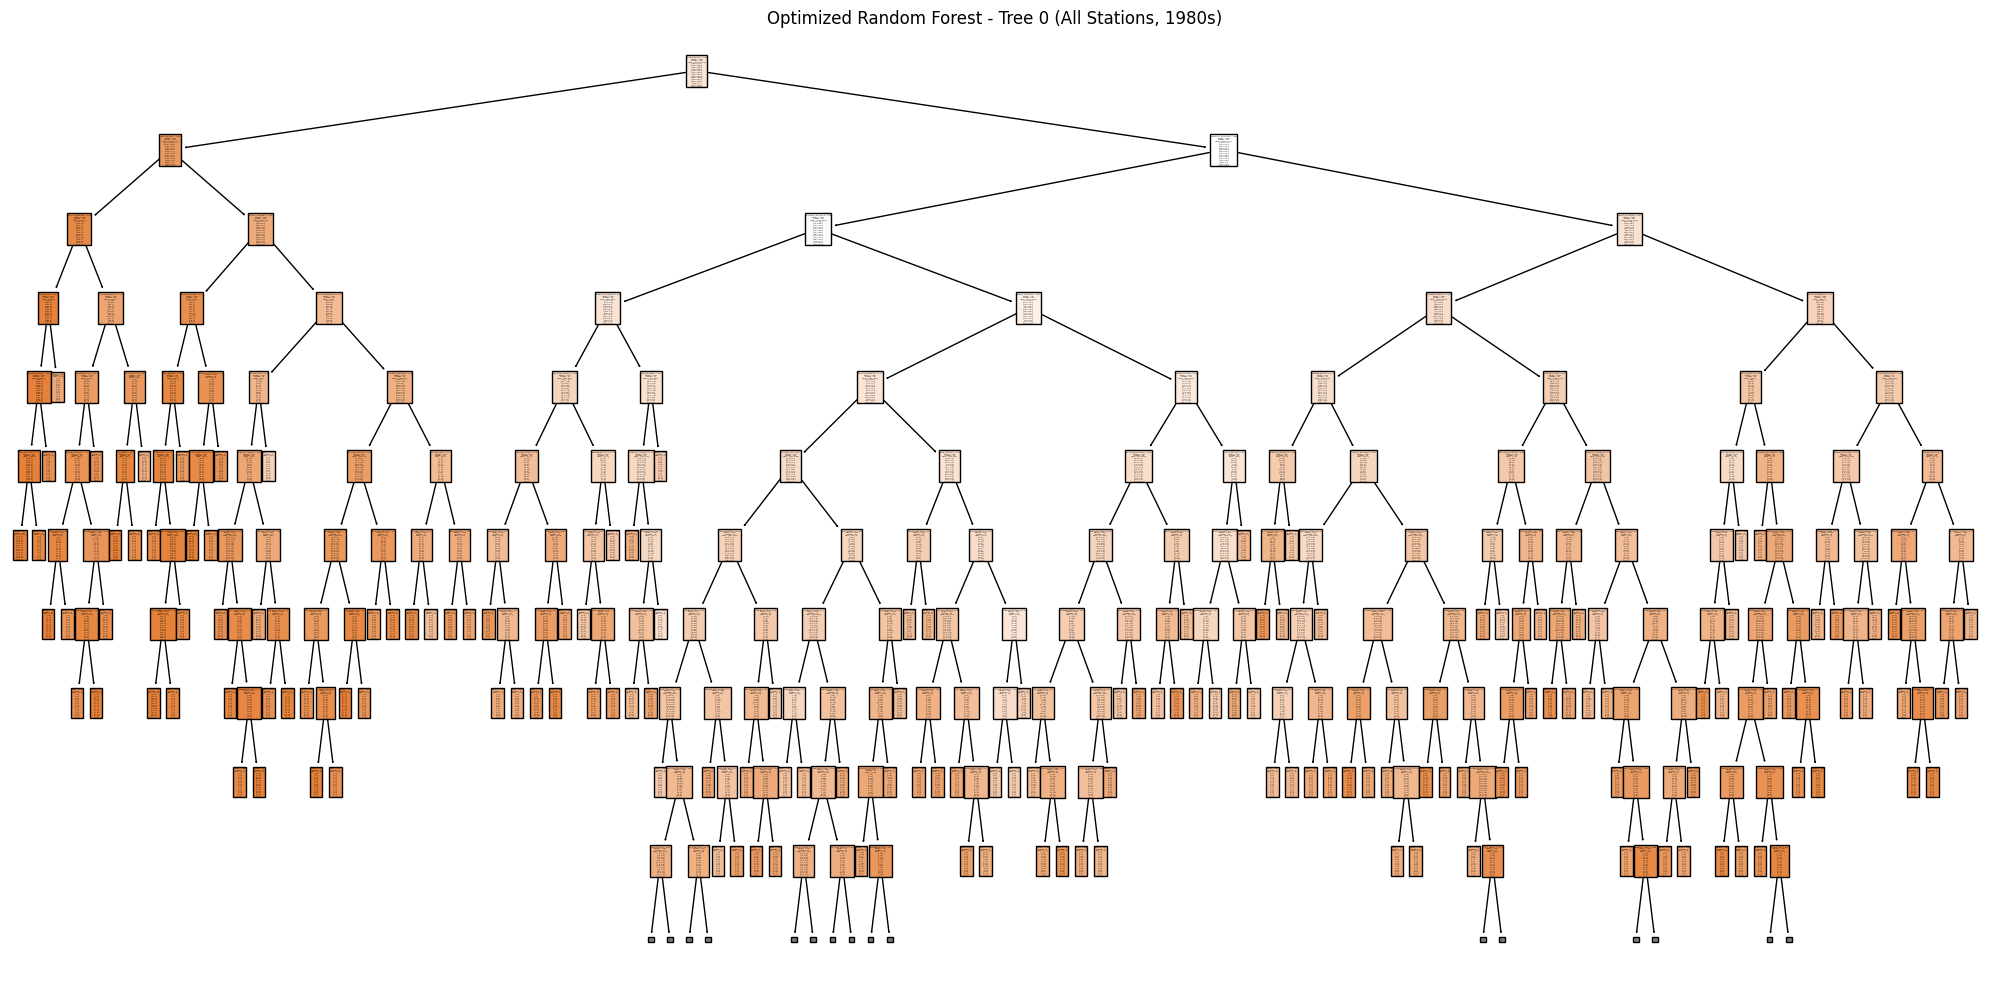

In [34]:
# Plot one tree from the optimized forest
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_decade_optimized.estimators_[0], 
          max_depth=10,
          filled=True,
          feature_names=feature_names,
          ax=ax)
ax.set_title("Optimized Random Forest - Tree 0 (All Stations, 1980s)")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'tree_optimized_all_stations_decade.png'), bbox_inches='tight')
plt.show()

### All Years

Top 20 Most Important Features:
                      feature  importance
44        DUSSELDORF_temp_max    0.341386
40   DUSSELDORF_precipitation    0.067604
88            MADRID_temp_max    0.064788
66    LJUBLJANA_precipitation    0.049562
13     BELGRADE_precipitation    0.039279
4         BASEL_precipitation    0.031690
22     BUDAPEST_precipitation    0.030927
17          BELGRADE_temp_max    0.028853
84       MADRID_precipitation    0.026673
92     MUNCHENB_precipitation    0.022402
105             OSLO_temp_max    0.022320
70         LJUBLJANA_temp_max    0.021944
101        OSLO_precipitation    0.019257
57       KASSEL_precipitation    0.017466
49     HEATHROW_precipitation    0.016932
26          BUDAPEST_temp_max    0.015185
35            DEBILT_temp_max    0.014894
31       DEBILT_precipitation    0.014572
118   STOCKHOLM_precipitation    0.013081
53          HEATHROW_temp_max    0.012114

Importance by Observation Type:
observation_type
temp_max            0.576782
precipi

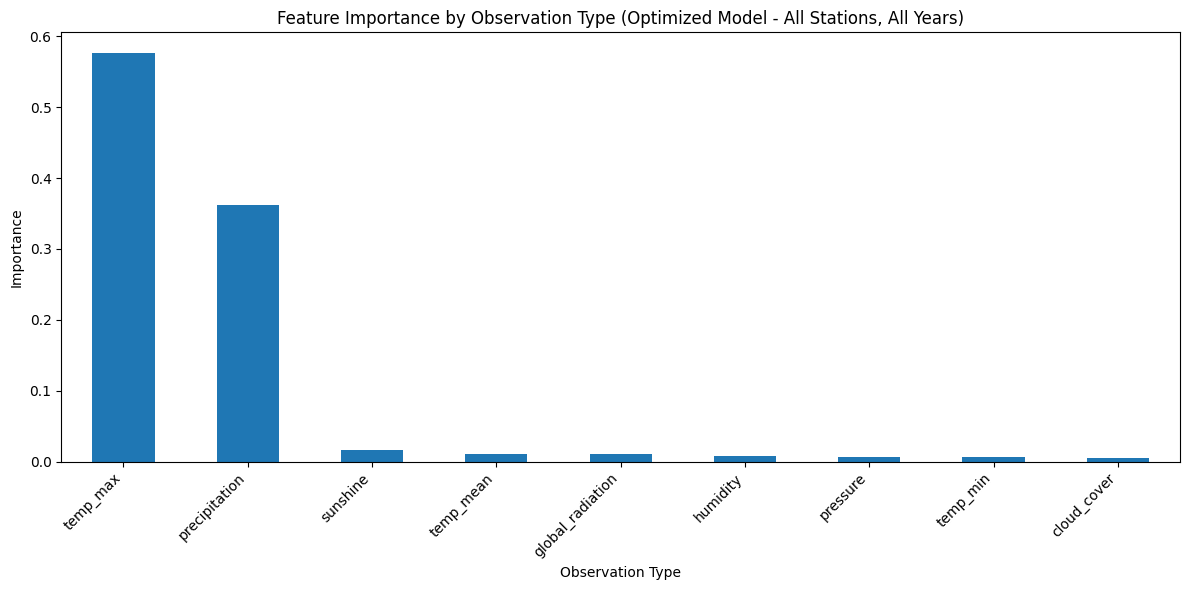

In [35]:
# Get feature importances
importances = clf_all_optimized.feature_importances_

# Get all feature names
feature_names = [col for col in df_weather_cleaned_1980s.columns if col != 'DATE']

# Create a dataframe for easier analysis
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Show top 20 most important features
print("Top 20 Most Important Features:")
print(importance_df.head(20))

# Group by observation type (everything after station name)
importance_df['observation_type'] = importance_df['feature'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Sum importances by observation type
obs_type_importance = importance_df.groupby('observation_type')['importance'].sum().sort_values(ascending=False)

print("\nImportance by Observation Type:")
print(obs_type_importance)

# Create bar chart
plt.figure(figsize=(12, 6))
obs_type_importance.plot(kind='bar')
plt.ylabel('Importance')
plt.xlabel('Observation Type')
plt.title('Feature Importance by Observation Type (Optimized Model - All Stations, All Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'feature_importance_by_type_optimized_all.png'), bbox_inches='tight')
plt.show()

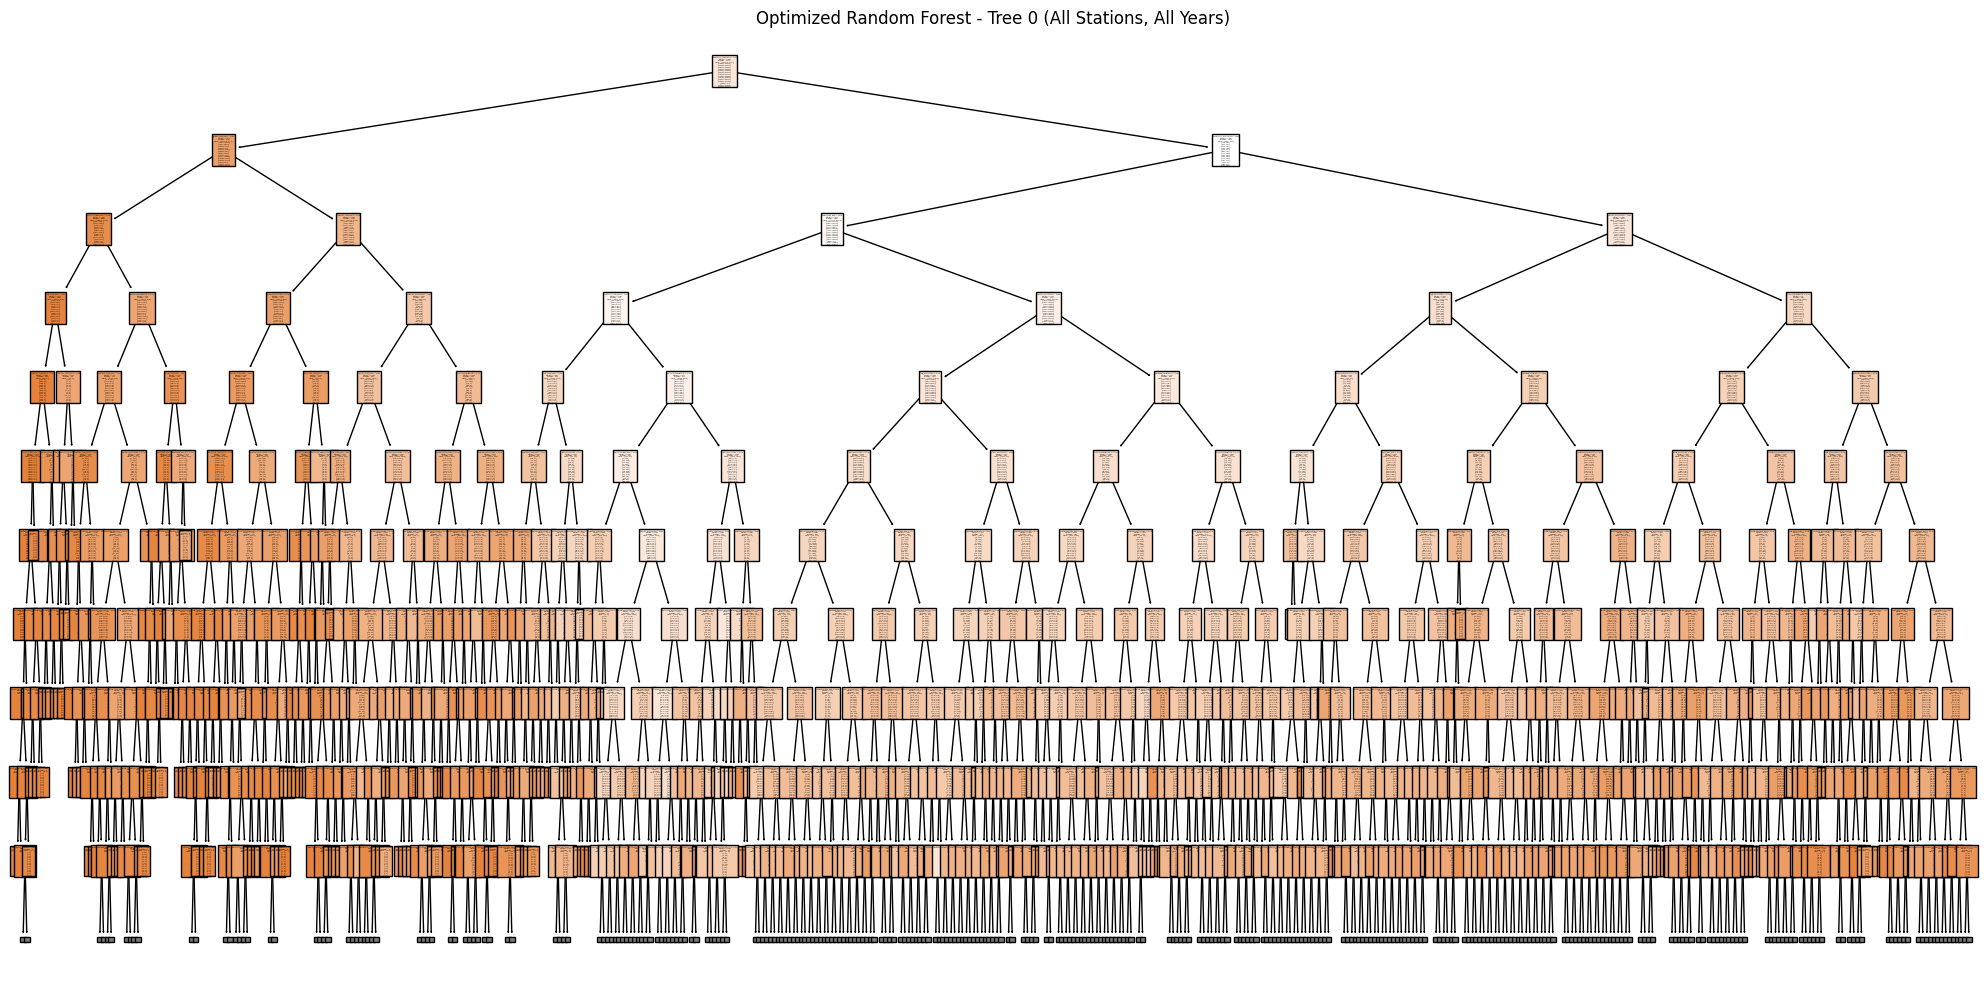

In [36]:
# Plot one tree from the optimized forest
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_all_optimized.estimators_[0], 
          max_depth=10,
          filled=True,
          feature_names=feature_names,
          ax=ax)
ax.set_title("Optimized Random Forest - Tree 0 (All Stations, All Years)")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'tree_optimized_all_stations_all.png'), bbox_inches='tight')
plt.show()

### Dusseldorf Optimized

In [37]:
# 1. Prepare DUSSELDORF data (single station, all timeline)
dusseldorf_cols = [col for col in df_weather_cleaned.columns if col.startswith('DUSSELDORF_')]
X_dusseldorf = df_weather_cleaned[dusseldorf_cols].to_numpy()
y_dusseldorf = df_pleasant['DUSSELDORF_pleasant_weather'].to_numpy()

print(f"X_dusseldorf shape: {X_dusseldorf.shape}")  # Should be (22950, 9)
print(f"y_dusseldorf shape: {y_dusseldorf.shape}")  # Should be (22950,)

# 2. Split the data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_dusseldorf, y_dusseldorf, test_size=0.2, random_state=42
)

# 3. Define hyperparameter distributions (same as before)
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 30),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# 4. Run RandomizedSearchCV
rf_dusseldorf = RandomForestClassifier(random_state=42)
random_search_dusseldorf = RandomizedSearchCV(
    rf_dusseldorf,
    param_distributions=param_distributions,
    n_iter=10,  # Start small
    cv=5,
    random_state=42,
    n_jobs=-2,
    verbose=2
)
random_search_dusseldorf.fit(X_train_d, y_train_d)

# 5. Get best parameters and scores
print("Best parameters:", random_search_dusseldorf.best_params_)
print("Best cross-validation score:", random_search_dusseldorf.best_score_)
test_score_dusseldorf = random_search_dusseldorf.score(X_test_d, y_test_d)
print("Test score with best parameters:", test_score_dusseldorf)

# 6. Get the optimized model for further analysis
clf_dusseldorf_optimized = random_search_dusseldorf.best_estimator_
train_accuracy_dusseldorf = clf_dusseldorf_optimized.score(X_train_d, y_train_d)
test_accuracy_dusseldorf = clf_dusseldorf_optimized.score(X_test_d, y_test_d)

print(f"\nTraining accuracy (optimized): {train_accuracy_dusseldorf:.4f}")
print(f"Test accuracy (optimized): {test_accuracy_dusseldorf:.4f}")

X_dusseldorf shape: (22950, 9)
y_dusseldorf shape: (22950,)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': None, 'min_samples_leaf': 26, 'min_samples_split': 20, 'n_estimators': 124}
Best cross-validation score: 1.0
Test score with best parameters: 1.0

Training accuracy (optimized): 1.0000
Test accuracy (optimized): 1.0000


DUSSELDORF Feature Importances:
            feature  importance
4     precipitation    0.490078
8          temp_max    0.458821
5          sunshine    0.051101
0       cloud_cover    0.000000
1          humidity    0.000000
3  global_radiation    0.000000
2          pressure    0.000000
6         temp_mean    0.000000
7          temp_min    0.000000


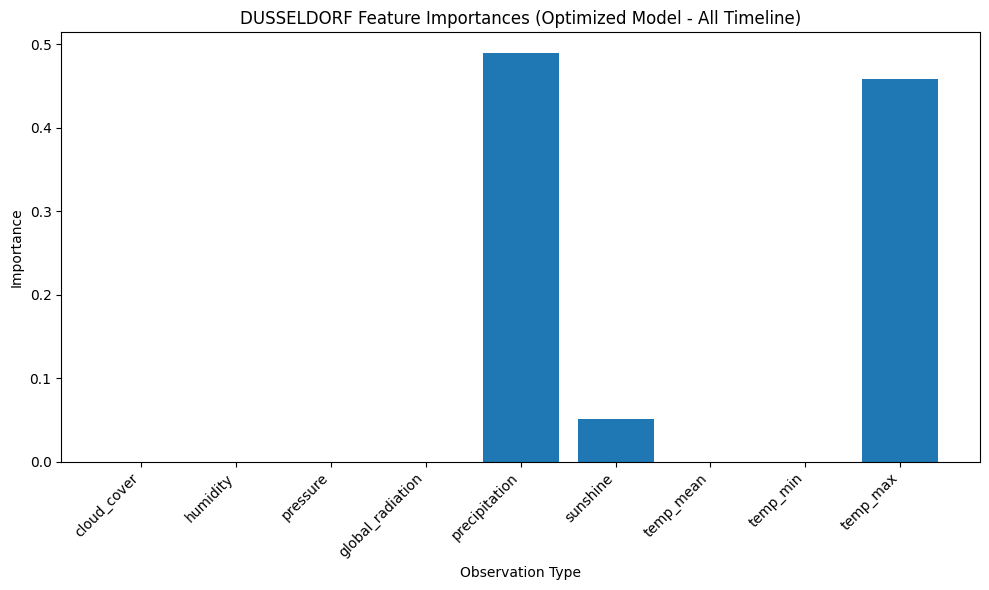

In [38]:
# Feature importances for DUSSELDORF
importances_duss = clf_dusseldorf_optimized.feature_importances_
feature_names_duss = [col.replace('DUSSELDORF_', '') for col in dusseldorf_cols]

# Create dataframe
importance_df_duss = pd.DataFrame({
    'feature': feature_names_duss,
    'importance': importances_duss
}).sort_values('importance', ascending=False)

print("DUSSELDORF Feature Importances:")
print(importance_df_duss)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_duss)), importances_duss)
plt.xticks(range(len(importances_duss)), feature_names_duss, rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Observation Type')
plt.title('DUSSELDORF Feature Importances (Optimized Model - All Timeline)')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dusseldorf_feature_importance_optimized.png'), bbox_inches='tight')
plt.show()

# Part 2: Deep Learning

## Import/Prep

### Import

In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D, LSTM, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import type_of_target
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [40]:
# Load data
df_weather_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_cleaned.csv'))
df_pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

### Prep and Checks

In [41]:
# Prepare X - reshape to (22950, 15, 9)
X = df_weather_cleaned.to_numpy()
print(f"Original X shape: {X.shape}")

# Reshape to (samples, stations, features_per_station)
X = X.reshape(22950, 15, 9)
print(f"Reshaped X shape: {X.shape}")

# Prepare y - convert to single class using argmax
y_multi = df_pleasant.drop(columns=['DATE']).to_numpy()
print(f"y_multi shape: {y_multi.shape}")

# Use argmax to get the station with pleasant weather (single class)
y = np.argmax(y_multi, axis=1)
print(f"y shape after argmax: {y.shape}")

# Check the target type
print(f"Target type: {type_of_target(y)}")  # Should be 'multiclass'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Original X shape: (22950, 135)
Reshaped X shape: (22950, 15, 9)
y_multi shape: (22950, 15)
y shape after argmax: (22950,)
Target type: multiclass

X_train shape: (18360, 15, 9)
y_train shape: (18360,)
X_test shape: (4590, 15, 9)
y_test shape: (4590,)


## LSTM (binary_crossentropy)

### Check

In [51]:
print("="*60)
print("Multi-Label Binary Classification")
print("="*60)

# Prepare data for multi-label approach
# X stays the same: (22950, 15, 9)
X_multi = df_weather_cleaned.to_numpy().reshape(22950, 15, 9)

# y is multi-label: (22950, 15) - binary for each station
y_multi = df_pleasant.drop(columns=['DATE']).to_numpy()

print(f"X shape: {X_multi.shape}")
print(f"y shape: {y_multi.shape}")
print(f"Target type: {type_of_target(y_multi)}")  # Should be 'multilabel-indicator'

# Split the data
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

print(f"\nX_train shape: {X_train_ml.shape}")
print(f"y_train shape: {y_train_ml.shape}")

Multi-Label Binary Classification
X shape: (22950, 15, 9)
y shape: (22950, 15)
Target type: multilabel-indicator



X_train shape: (18360, 15, 9)
y_train shape: (18360, 15)


## LSTM Build Check (Multi-Label Binary)

In [ ]:
def create_lstm_model_multilabel(learning_rate=0.001, num_layers=1, num_nodes=64, 
                                  dropout_rate=0.2, use_batch_norm=0):
    """
    Create an LSTM model for multi-label binary classification.
    """
    
    model = Sequential()
    
    if int(num_layers) == 1:
        # Single LSTM layer
        model.add(LSTM(int(num_nodes), input_shape=(15, 9)))
        model.add(Dropout(dropout_rate))
    else:
        # Multiple LSTM layers
        model.add(LSTM(int(num_nodes), return_sequences=True, input_shape=(15, 9)))
        if use_batch_norm >= 0.5:
            model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
        
        # Middle layers
        for i in range(int(num_layers) - 2):
            model.add(LSTM(int(num_nodes), return_sequences=True))
            model.add(Dropout(dropout_rate))
        
        # Last LSTM layer
        model.add(LSTM(int(num_nodes)))
        model.add(Dropout(dropout_rate))
    
    # Dense layer
    model.add(Dense(int(num_nodes // 2), activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer - 15 binary outputs (sigmoid for each station)
    model.add(Dense(15, activation='sigmoid'))
    
    # Compile with binary crossentropy
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['binary_accuracy'])
    
    return model


def optimize_lstm_model_multilabel(learning_rate, num_layers, num_nodes, 
                                    dropout_rate, use_batch_norm):
    """
    Optimization function for multi-label approach.
    """
    
    model = create_lstm_model_multilabel(
        learning_rate=learning_rate,
        num_layers=int(num_layers),
        num_nodes=int(num_nodes),
        dropout_rate=dropout_rate,
        use_batch_norm=use_batch_norm
    )
    
    # Early stopping
    es = EarlyStopping(monitor='val_binary_accuracy', mode='max', patience=5, verbose=0)
    
    # Train
    history = model.fit(
        X_train_ml, y_train_ml,
        validation_split=0.2,
        epochs=20,
        batch_size=32,
        callbacks=[es],
        verbose=0
    )
    
    # Return best validation accuracy
    return max(history.history['val_binary_accuracy'])


# Same parameter bounds
pbounds_ml = {
    'learning_rate': (0.0001, 0.01),
    'num_layers': (1, 3),
    'num_nodes': (32, 128),
    'dropout_rate': (0.1, 0.5),
    'use_batch_norm': (0, 1)
}

print("\nMulti-label LSTM optimization ready!")

# Test the model
test_model_ml = create_lstm_model_multilabel()
test_model_ml.summary()


Multi-label LSTM optimization ready!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,519 (84.06 KB)

 Trainable params: 21,519 (84.06 KB)

 Non-trainable params: 0 (0.00 B)

### Run Bayesian Optimization

In [44]:
# Set random seed
tf.random.set_seed(42)
np.random.seed(42)

# Initialize Bayesian Optimization for multi-label
optimizer_ml = BayesianOptimization(
    f=optimize_lstm_model_multilabel,
    pbounds=pbounds_ml,
    random_state=42,
    verbose=2
)

# Run optimization
print("\nStarting Multi-Label Bayesian Optimization...")
print("This will take approximately 10-15 minutes...")
print("\n" + "="*60 + "\n")

optimizer_ml.maximize(
    init_points=5,
    n_iter=5
)

print("\n" + "="*60)
print("Multi-Label Optimization complete!")
print("\nBest parameters found:")
print(optimizer_ml.max['params'])
print(f"\nBest validation binary accuracy: {optimizer_ml.max['target']:.4f}")


Starting Multi-Label Bayesian Optimization...
This will take approximately 10-15 minutes...


|   iter    |  target   | learni... | num_la... | num_nodes | dropou... | use_ba... |
-------------------------------------------------------------------------------------


| 1         | 0.9587145 | 0.0038079 | 2.9014286 | 102.27141 | 0.3394633 | 0.1560186 |
| 2         | 0.9498184 | 0.0016443 | 1.1161672 | 115.15290 | 0.3404460 | 0.7080725 |
| 3         | 0.9316994 | 0.0003037 | 2.9398197 | 111.91449 | 0.1849356 | 0.1818249 |
| 4         | 0.9422295 | 0.0019157 | 1.6084844 | 82.376617 | 0.2727780 | 0.2912291 |
| 5         | 0.9291940 | 0.0061573 | 1.2789877 | 60.045886 | 0.2465447 | 0.4560699 |
| 6         | 0.9300652 | 0.0061146 | 1.0106782 | 107.40272 | 0.3526560 | 0.4507238 |
| 7         | 0.9529232 | 0.0040143 | 2.1814413 | 59.363243 | 0.2838138 | 0.2023637 |
| 8         | 0.9695714 | 0.0046131 | 2.5339213 | 81.824597 | 0.1484099 | 0.0783976 |
| 9         | 0.9195351 | 0.0011603 | 2.0505844 | 47.316048 | 0.4304372 | 0.7434306 |
| 10        | 0.9389434 | 0.0094952 | 2.9605227 | 90.459805 | 0.2992141 | 0.3349173 |

Multi-Label Optimization complete!

Best parameters found:
{'learning_rate': np.float64(0.00461311131376332), 'num_layers': np.float64(2.53

### Run Optimized LSTM

In [45]:
# Extract best parameters
best_params_ml = optimizer_ml.max['params']
best_learning_rate_ml = best_params_ml['learning_rate']
best_num_layers_ml = int(round(best_params_ml['num_layers']))
best_num_nodes_ml = int(round(best_params_ml['num_nodes']))
best_dropout_rate_ml = best_params_ml['dropout_rate']
best_use_batch_norm_ml = best_params_ml['use_batch_norm']

print("Final multi-label model parameters:")
print(f"  Learning rate: {best_learning_rate_ml:.6f}")
print(f"  Number of layers: {best_num_layers_ml}")
print(f"  Nodes per layer: {best_num_nodes_ml}")
print(f"  Dropout rate: {best_dropout_rate_ml:.4f}")
print(f"  Batch normalization: {best_use_batch_norm_ml >= 0.5}")

# Create the optimized multi-label model
model_optimized_ml = create_lstm_model_multilabel(
    learning_rate=best_learning_rate_ml,
    num_layers=best_num_layers_ml,
    num_nodes=best_num_nodes_ml,
    dropout_rate=best_dropout_rate_ml,
    use_batch_norm=best_use_batch_norm_ml
)

# Train on full training set
print("\nTraining final multi-label model...")
history_ml = model_optimized_ml.fit(
    X_train_ml, y_train_ml,
    validation_data=(X_test_ml, y_test_ml),
    epochs=30,
    batch_size=32,
    verbose=1
)

# Evaluate
train_loss_ml, train_acc_ml = model_optimized_ml.evaluate(X_train_ml, y_train_ml, verbose=0)
test_loss_ml, test_acc_ml = model_optimized_ml.evaluate(X_test_ml, y_test_ml, verbose=0)

print(f"\nFinal Multi-Label Results:")
print(f"Training binary accuracy: {train_acc_ml:.4f}")
print(f"Test binary accuracy: {test_acc_ml:.4f}")

Final multi-label model parameters:
  Learning rate: 0.004613
  Number of layers: 3
  Nodes per layer: 82
  Dropout rate: 0.1484
  Batch normalization: False

Training final multi-label model...
Epoch 1/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - binary_accuracy: 0.8636 - loss: 0.2828 - val_binary_accuracy: 0.8922 - val_loss: 0.2361
Epoch 2/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - binary_accuracy: 0.8960 - loss: 0.2300 - val_binary_accuracy: 0.9065 - val_loss: 0.2063
Epoch 3/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - binary_accuracy: 0.9084 - loss: 0.2056 - val_binary_accuracy: 0.9212 - val_loss: 0.1810
Epoch 4/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - binary_accuracy: 0.9173 - loss: 0.1891 - val_binary_accuracy: 0.9216 - val_loss: 0.1859
Epoch 5/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - binary_accuracy: 0.9230 - loss: 0.1793 - val_binary_accuracy: 0.9330 - val_loss: 0.1580
Epoch 6/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - binary_accuracy: 0.9293 - loss: 0.

### Confusion Matrix

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion matrix shape: (15, 2, 2)


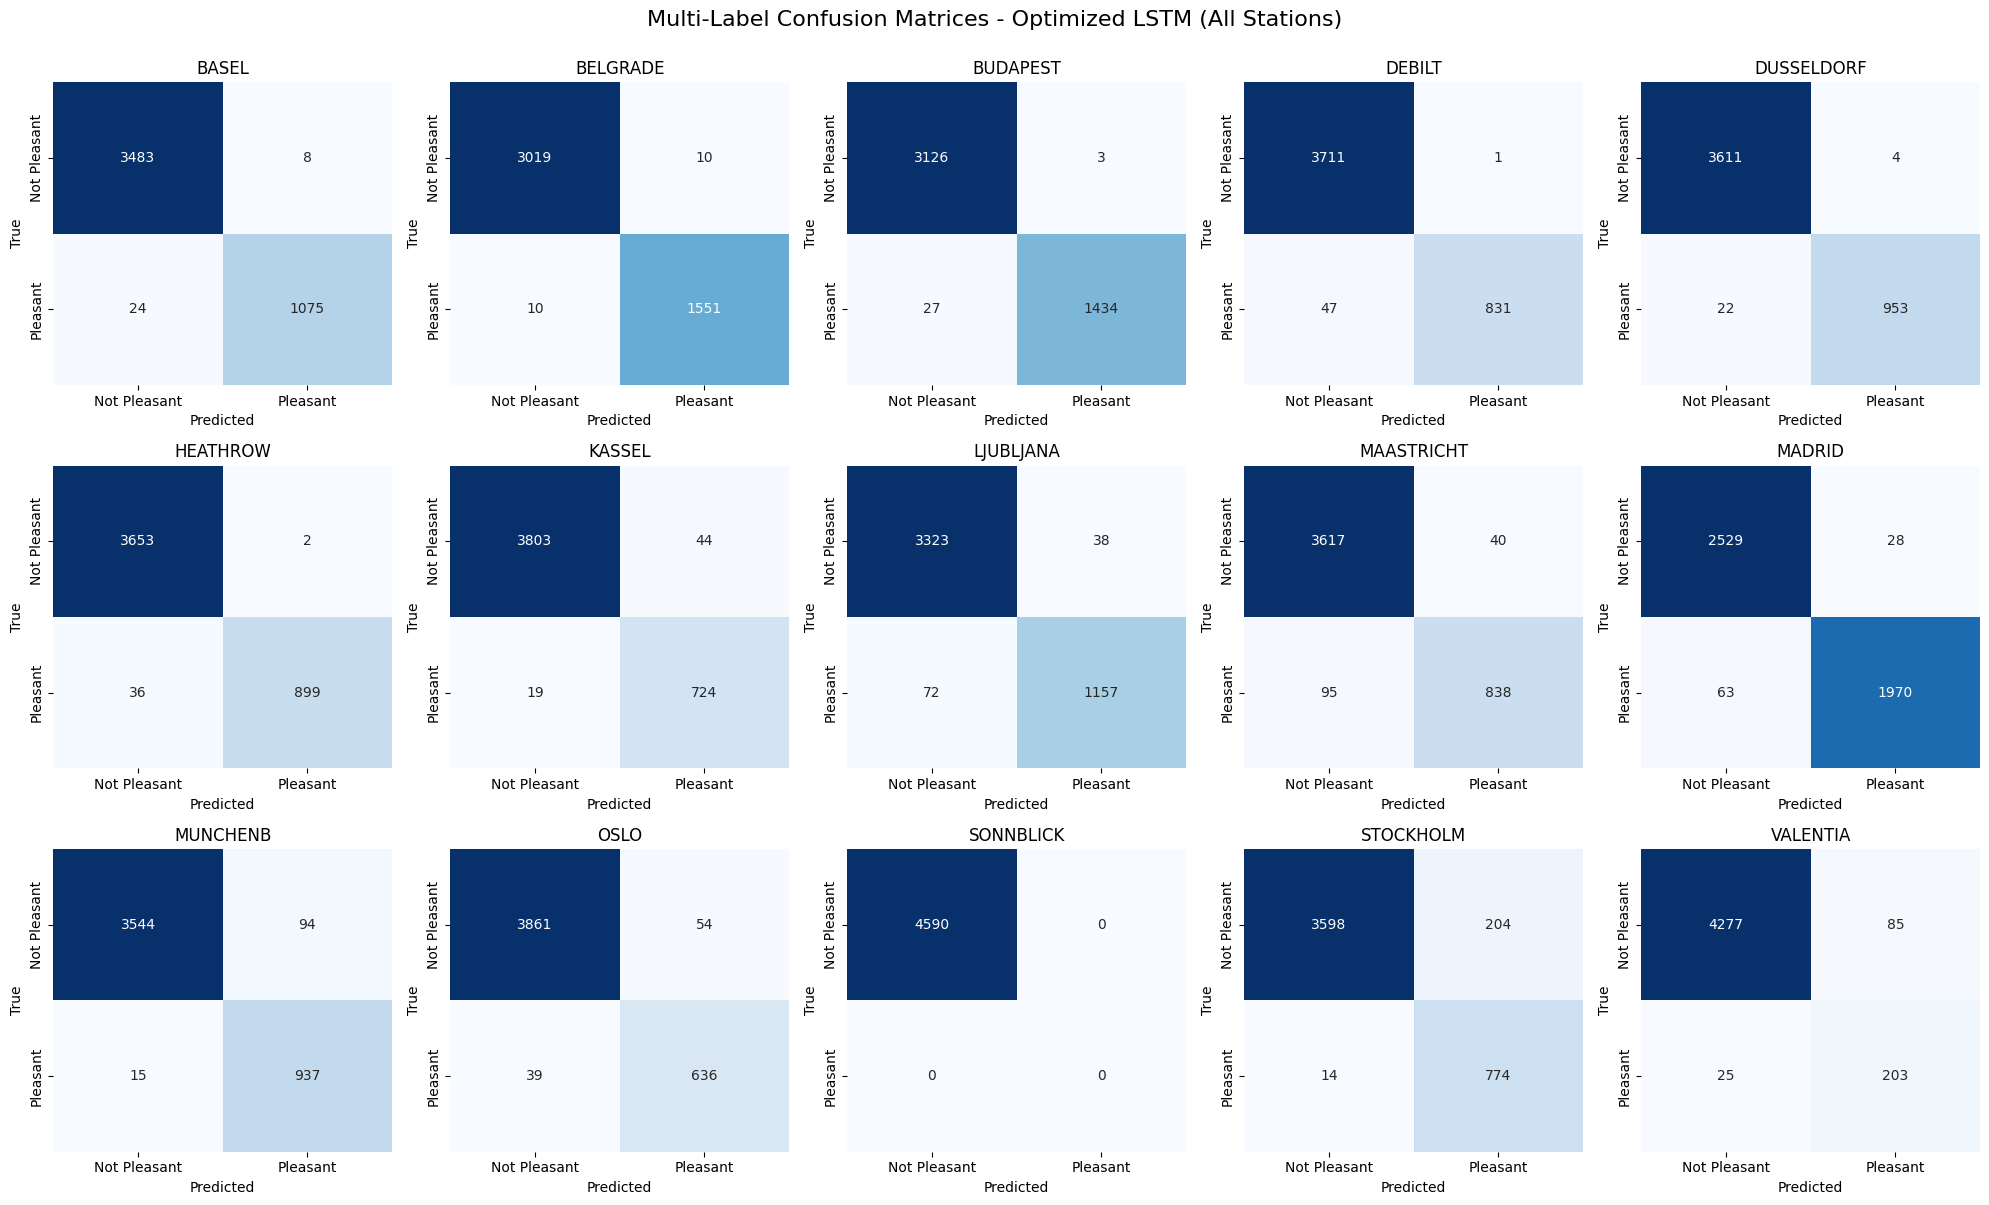


Per-Station Classification Report:
              precision    recall  f1-score   support

       BASEL       0.99      0.98      0.99      1099
    BELGRADE       0.99      0.99      0.99      1561
    BUDAPEST       1.00      0.98      0.99      1461
      DEBILT       1.00      0.95      0.97       878
  DUSSELDORF       1.00      0.98      0.99       975
    HEATHROW       1.00      0.96      0.98       935
      KASSEL       0.94      0.97      0.96       743
   LJUBLJANA       0.97      0.94      0.95      1229
  MAASTRICHT       0.95      0.90      0.93       933
      MADRID       0.99      0.97      0.98      2033
    MUNCHENB       0.91      0.98      0.95       952
        OSLO       0.92      0.94      0.93       675
   SONNBLICK       0.00      0.00      0.00         0
   STOCKHOLM       0.79      0.98      0.88       788
    VALENTIA       0.70      0.89      0.79       228

   micro avg       0.96      0.96      0.96     14490
   macro avg       0.88      0.89      0.88 

In [46]:
# Make predictions
y_pred_ml_probs = model_optimized_ml.predict(X_test_ml)
y_pred_ml_binary = (y_pred_ml_probs > 0.5).astype(int)

# Multi-label confusion matrix (one per station)
from sklearn.metrics import multilabel_confusion_matrix

cm_multilabel = multilabel_confusion_matrix(y_test_ml, y_pred_ml_binary)

print(f"Confusion matrix shape: {cm_multilabel.shape}")  # Should be (15, 2, 2)

# Station names
station_names = df_pleasant.drop(columns=['DATE']).columns.tolist()
station_names_short = [name.replace('_pleasant_weather', '') for name in station_names]

# Plot confusion matrices for all stations
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.ravel()

for idx, (station, cm) in enumerate(zip(station_names_short, cm_multilabel)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Not Pleasant', 'Pleasant'],
                yticklabels=['Not Pleasant', 'Pleasant'],
                cbar=False)
    axes[idx].set_title(f'{station}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

plt.suptitle('Multi-Label Confusion Matrices - Optimized LSTM (All Stations)', 
             fontsize=16, y=1.00)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 
                         'confusion_matrix_multilabel_optimized.png'), 
            bbox_inches='tight', dpi=300)
plt.show()

# Classification report per station
print("\nPer-Station Classification Report:")
print(classification_report(y_test_ml, y_pred_ml_binary, 
                           target_names=station_names_short,
                           zero_division=0))

## *Ignore for review* LSTM Test for fun (sparse_categorical_crossentropy)

The reason I did this section is because I couldn't help but follow instructions just in case it provided better results.

In [47]:
# def create_lstm_model(learning_rate=0.001, num_layers=1, num_nodes=64, 
#                       dropout_rate=0.2, use_batch_norm=0):
#     """
#     Create an LSTM model with variable architecture.
#     """
    
#     model = Sequential()
    
#     if int(num_layers) == 1:
#         # Single LSTM layer
#         model.add(LSTM(int(num_nodes), input_shape=(15, 9)))
#         model.add(Dropout(dropout_rate))
#     else:
#         # Multiple LSTM layers
#         # First layer(s) return sequences
#         model.add(LSTM(int(num_nodes), return_sequences=True, input_shape=(15, 9)))
#         if use_batch_norm >= 0.5:
#             model.add(BatchNormalization())
#         model.add(Dropout(dropout_rate))
        
#         # Middle layers (if any)
#         for i in range(int(num_layers) - 2):
#             model.add(LSTM(int(num_nodes), return_sequences=True))
#             model.add(Dropout(dropout_rate))
        
#         # Last LSTM layer (doesn't return sequences)
#         model.add(LSTM(int(num_nodes)))
#         model.add(Dropout(dropout_rate))
    
#     # Dense layer before output
#     model.add(Dense(int(num_nodes // 2), activation='relu'))
#     model.add(Dropout(dropout_rate))
    
#     # Output layer - 15 classes (stations)
#     model.add(Dense(15, activation='softmax'))
    
#     # Compile
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(loss='sparse_categorical_crossentropy',
#                   optimizer=optimizer,
#                   metrics=['accuracy'])
    
#     return model


# def optimize_lstm_model(learning_rate, num_layers, num_nodes, dropout_rate, use_batch_norm):
#     """
#     Function to be optimized by Bayesian Optimization.
#     Trains LSTM and returns validation accuracy.
#     """
    
#     model = create_lstm_model(
#         learning_rate=learning_rate,
#         num_layers=int(num_layers),
#         num_nodes=int(num_nodes),
#         dropout_rate=dropout_rate,
#         use_batch_norm=use_batch_norm
#     )
    
#     # Early stopping to prevent overfitting and save time
#     es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=0)
    
#     # Train the model
#     history = model.fit(
#         X_train, y_train,
#         validation_split=0.2,  # 20% of training data for validation
#         epochs=20,  # Early stopping will cut short if needed
#         batch_size=32,
#         callbacks=[es],
#         verbose=0  # Silent
#     )
    
#     # Return best validation accuracy
#     val_accuracy = max(history.history['val_accuracy'])
    
#     return val_accuracy


# # Define hyperparameter search space
# pbounds = {
#     'learning_rate': (0.0001, 0.01),       # Learning rate for optimizer
#     'num_layers': (1, 3),                   # 1-3 LSTM layers
#     'num_nodes': (32, 128),                 # Neurons per LSTM layer
#     'dropout_rate': (0.1, 0.5),             # Dropout probability
#     'use_batch_norm': (0, 1)                # Whether to use batch normalization
# }

# print("LSTM optimization function ready!")
# print("Parameter bounds:")
# for param, bounds in pbounds.items():
#     print(f"  {param}: {bounds}")

# # Test the model builds correctly
# test_model = create_lstm_model()
# test_model.summary()

### Run Bayesian Optimization

In [48]:
# # Set random seed for reproducibility
# tf.random.set_seed(42)
# np.random.seed(42)

# # Initialize Bayesian Optimization
# optimizer = BayesianOptimization(
#     f=optimize_lstm_model,
#     pbounds=pbounds,
#     random_state=42,
#     verbose=2
# )

# # Run the optimization
# print("Starting Bayesian Optimization...")
# print("This will take approximately 10-15 minutes...")
# print("\n" + "="*60 + "\n")

# optimizer.maximize(
#     init_points=5,
#     n_iter=5
# )

# print("\n" + "="*60)
# print("Optimization complete!")
# print("\nBest parameters found:")
# print(optimizer.max['params'])
# print(f"\nBest validation accuracy: {optimizer.max['target']:.4f}")

<!-- ### Run Optimized LSTM -->

In [49]:
# # Extract best parameters (convert to proper types)
# best_params = optimizer.max['params']
# best_learning_rate = best_params['learning_rate']
# best_num_layers = int(round(best_params['num_layers']))
# best_num_nodes = int(round(best_params['num_nodes']))
# best_dropout_rate = best_params['dropout_rate']
# best_use_batch_norm = best_params['use_batch_norm']

# print("Final model parameters:")
# print(f"  Learning rate: {best_learning_rate:.6f}")
# print(f"  Number of layers: {best_num_layers}")
# print(f"  Nodes per layer: {best_num_nodes}")
# print(f"  Dropout rate: {best_dropout_rate:.4f}")
# print(f"  Batch normalization: {best_use_batch_norm >= 0.5}")

# # Create the optimized model
# model_optimized = create_lstm_model(
#     learning_rate=best_learning_rate,
#     num_layers=best_num_layers,
#     num_nodes=best_num_nodes,
#     dropout_rate=best_dropout_rate,
#     use_batch_norm=best_use_batch_norm
# )

# # Train on full training set
# print("\nTraining final model...")
# history = model_optimized.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),  # Use actual test set for validation
#     epochs=30,
#     batch_size=32,
#     verbose=1
# )

# # Evaluate
# train_loss, train_acc = model_optimized.evaluate(X_train, y_train, verbose=0)
# test_loss, test_acc = model_optimized.evaluate(X_test, y_test, verbose=0)

# print(f"\nFinal Results:")
# print(f"Training accuracy: {train_acc:.4f}")
# print(f"Test accuracy: {test_acc:.4f}")

<!-- ### Confusion Matrix -->

In [50]:
# # Make predictions on test set
# y_pred_probs = model_optimized.predict(X_test)
# y_pred = np.argmax(y_pred_probs, axis=1)

# # Create confusion matrix
# from sklearn.metrics import confusion_matrix, classification_report

# # Specify all possible labels (0-14 for 15 stations)
# all_labels = list(range(15))

# cm = confusion_matrix(y_test, y_pred, labels=all_labels)

# # Station names for labels
# station_names = df_pleasant.drop(columns=['DATE']).columns.tolist()
# station_names_short = [name.replace('_pleasant_weather', '') for name in station_names]

# # Plot confusion matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=station_names_short,
#             yticklabels=station_names_short)
# plt.title('Confusion Matrix - Optimized LSTM Model')
# plt.ylabel('True Station')
# plt.xlabel('Predicted Station')
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'confusion_matrix_lstm_optimized.png'), 
#             bbox_inches='tight', dpi=300)
# plt.show()

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=station_names_short, labels=all_labels, zero_division=0))

# # Check which stations are in the test set
# print("\nStations present in test set:")
# unique_stations = np.unique(y_test)
# for station_idx in unique_stations:
#     print(f"  {station_names_short[station_idx]} (index {station_idx})")